## 그룹 연산은 데이터를 집계하거나 변환하는 등의 작업을 한 번에 처리할 수 있는 기능

## groupby 메서드로 평균 구하기

In [2]:
import pandas as pd
df = pd.read_csv('../data/python_data/gapminder.tsv', sep='\t')

In [3]:
#groupby 메서드를 사용 - year 열 기준, lifeExp 열의 평균값을 구함
avg_life_exp_by_year = df.groupby('year').lifeExp.mean()
print(avg_life_exp_by_year)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


## 분할-반영-결합 과정 살펴보기 - groupby 메서드
* groupby 메서드 자체를 분해하는 것은 불가능하므로 비슷한 연산을 수행

In [4]:
#groupby 메서드에 열 이름을 전달하면 '분할' 작업이 일어남
years = df.year.unique()    #df에서 unique 인 year만 가져옴
print(years)

[1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007]


In [5]:
#연도별로 데이터 추출: 1952년을 추출한 예.'반영-1'
y1952 = df.loc[df.year == 1952, : ]
print(y1952.head())

        country continent  year  lifeExp       pop    gdpPercap
0   Afghanistan      Asia  1952   28.801   8425333   779.445314
12      Albania    Europe  1952   55.230   1282697  1601.056136
24      Algeria    Africa  1952   43.077   9279525  2449.008185
36       Angola    Africa  1952   30.015   4232095  3520.610273
48    Argentina  Americas  1952   62.485  17876956  5911.315053


In [6]:
# 추출한 데이터의 평균을 구함 '반영-2'
y1952_mean = y1952.lifeExp.mean()
print(y1952_mean)

49.05761971830987


In [9]:
#연도별 평균값을 구함 - '반영-3'
y1957 = df.loc[df.year == 1957, :]
y1957_mean = y1957.lifeExp.mean()
print(y1957_mean)

y1962 = df.loc[df.year == 1962, :]
y1962_mean = y1962.lifeExp.mean()
print(y1962_mean)

y2007 = df.loc[df.year == 2007, :]
y2007_mean = y2007.lifeExp.mean()
print(y2007_mean)

51.507401126760534
53.60924901408449
67.00742253521126


In [11]:
df2 = pd.DataFrame({'year': [1952, 1957, 1962, 2007],
                   "" : [y1952_mean, y1957_mean, y1962_mean, y2007_mean]})
df2
#위의 2번째 셀의 과정(groupby)은 3,4,5,6,7 번째 셀의 과정과 같다.

,year,
0,1952,49.057620
1,1957,51.507401
2,1962,53.609249
3,2007,67.007423


## 평균값을 구하는 사용자 함수와 groupby 메서드
### 집계 기능을 내장하고있는 판다스 기본 함수에는
* mean(), max(), min(), sum(), count(), size(), var(), std(), describe(), info(), first(), last() 등이 있다.
* agg() 메소드 데이터 집계: group 객체.agg(매핑함수)

In [12]:
def my_mean(values):
    n = len(values)
    print('n: ', n)
    sum = 0       # 변수 초기화. 초기화는 garbage 값이 있을까봐 한다
    for value in values:
        print('value: ', value)
        sum += value
        print('sum: ', sum)
    return sum / n

In [13]:
my_mean([1,2,4,7])

n:  4
value:  1
sum:  1
value:  2
sum:  3
value:  4
sum:  7
value:  7
sum:  14


3.5

In [14]:
my_mean([1,2,4,7,88])

n:  5
value:  1
sum:  1
value:  2
sum:  3
value:  4
sum:  7
value:  7
sum:  14
value:  88
sum:  102


20.4

In [16]:
#사용자 정의 함수(my_mean)를 groupby 메서드와 조합하기 위해 agg 메서드를 사용
agg_my_mean = df.groupby('year').lifeExp.agg(my_mean)    #agg와 apply 비교
print(agg_my_mean)

n:  142
value:  28.801
sum:  28.801
value:  55.23
sum:  84.03099999999999
value:  43.077
sum:  127.10799999999999
value:  30.015
sum:  157.123
value:  62.485
sum:  219.608
value:  69.12
sum:  288.728
value:  66.8
sum:  355.528
value:  50.939
sum:  406.46700000000004
value:  37.484
sum:  443.951
value:  68.0
sum:  511.951
value:  38.223
sum:  550.174
value:  40.414
sum:  590.588
value:  53.82
sum:  644.408
value:  47.622
sum:  692.03
value:  50.917
sum:  742.947
value:  59.6
sum:  802.547
value:  31.975
sum:  834.522
value:  39.031
sum:  873.553
value:  39.417
sum:  912.97
value:  38.523
sum:  951.493
value:  68.75
sum:  1020.243
value:  35.463
sum:  1055.7060000000001
value:  38.092
sum:  1093.7980000000002
value:  54.745
sum:  1148.5430000000001
value:  44.0
sum:  1192.5430000000001
value:  50.643
sum:  1243.1860000000001
value:  40.715
sum:  1283.901
value:  39.143
sum:  1323.044
value:  42.111
sum:  1365.1550000000002
value:  57.206
sum:  1422.361
value:  40.477
sum:  1462.838000000

In [17]:
# apply 메서드를 사용해도 같은 결과가 나옴
agg_my_mean = df.groupby('year').lifeExp.apply(my_mean)    #함수가 1개일때는 apply,여러개일때는 agg()를 쓴다. 함수1개일때는 결과값동일
print(agg_my_mean)

n:  142
value:  28.801
sum:  28.801
value:  55.23
sum:  84.03099999999999
value:  43.077
sum:  127.10799999999999
value:  30.015
sum:  157.123
value:  62.485
sum:  219.608
value:  69.12
sum:  288.728
value:  66.8
sum:  355.528
value:  50.939
sum:  406.46700000000004
value:  37.484
sum:  443.951
value:  68.0
sum:  511.951
value:  38.223
sum:  550.174
value:  40.414
sum:  590.588
value:  53.82
sum:  644.408
value:  47.622
sum:  692.03
value:  50.917
sum:  742.947
value:  59.6
sum:  802.547
value:  31.975
sum:  834.522
value:  39.031
sum:  873.553
value:  39.417
sum:  912.97
value:  38.523
sum:  951.493
value:  68.75
sum:  1020.243
value:  35.463
sum:  1055.7060000000001
value:  38.092
sum:  1093.7980000000002
value:  54.745
sum:  1148.5430000000001
value:  44.0
sum:  1192.5430000000001
value:  50.643
sum:  1243.1860000000001
value:  40.715
sum:  1283.901
value:  39.143
sum:  1323.044
value:  42.111
sum:  1365.1550000000002
value:  57.206
sum:  1422.361
value:  40.477
sum:  1462.838000000

## 두 개의 인자값을 받아 처리하는 사용자 합수와 groupby 메서드

In [28]:
# 첫 번째 인자로 받은 열의 평균값을 구하여
# 두 번째 인자로 받은 값과의 차이를 계산하여 반환하는 함수: my_mean_diff
def my_mean_diff(values, diff_value):
    n = len(values)
    #print('n: ', n)
    sum = 0
    for value in values:
        sum += value
        #print('sum: ', sum)
    mean = sum / n
    print('mean: ', mean)       #연도별 평균 수명
    return mean - diff_value

In [29]:
my_mean_diff([1,2,3,4], 10)

mean:  2.5


-7.5

In [30]:
global_mean = df.lifeExp.mean()   #평균기대수명
print(global_mean)

59.47443936619714


In [31]:
agg_mean_diff = df.groupby('year').lifeExp.agg(my_mean_diff, diff_value = global_mean)
print(agg_mean_diff)

mean:  49.05761971830987
mean:  51.507401126760534
mean:  53.60924901408449
mean:  55.67828957746479
mean:  57.647386478873244
mean:  59.57015746478873
mean:  61.53319718309858
mean:  63.21261267605636
mean:  64.16033802816901
mean:  65.01467605633805
mean:  65.69492253521126
mean:  67.00742253521126
year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
1977     0.095718
1982     2.058758
1987     3.738173
1992     4.685899
1997     5.540237
2002     6.220483
2007     7.532983
Name: lifeExp, dtype: float64


In [50]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [66]:
newdf = pd.DataFrame(
    data = {
        'year': years,
        '연도별평균수명': avg_life_exp_by_year,
        '전체평균수명': global_mean,
        '결과': agg_mean_diff 
    }
)
newdf.reset_index(drop=True)   # index reset하기 - 기존 index 제거 O

,year,연도별평균수명,전체평균수명,결과
0,1952,49.057620,59.474439,-10.416820
1,1957,51.507401,59.474439,-7.967038
2,1962,53.609249,59.474439,-5.865190
3,1967,55.678290,59.474439,-3.796150
4,1972,57.647386,59.474439,-1.827053
5,1977,59.570157,59.474439,0.095718
6,1982,61.533197,59.474439,2.058758
7,1987,63.212613,59.474439,3.738173
8,1992,64.160338,59.474439,4.685899
9,1997,65.014676,59.474439,5.540237


In [67]:
#위와 같은 결과
df3 = pd.DataFrame({'year': years, '연도별 평균 수명': agg_my_mean.values, '전체 평균 수명': global_mean, '결과': agg_mean_diff.values})
df3

,year,연도별 평균 수명,전체 평균 수명,결과
0,1952,49.057620,59.474439,-10.416820
1,1957,51.507401,59.474439,-7.967038
2,1962,53.609249,59.474439,-5.865190
3,1967,55.678290,59.474439,-3.796150
4,1972,57.647386,59.474439,-1.827053
5,1977,59.570157,59.474439,0.095718
6,1982,61.533197,59.474439,2.058758
7,1987,63.212613,59.474439,3.738173
8,1992,64.160338,59.474439,4.685899
9,1997,65.014676,59.474439,5.540237


## 집계 메서드를 리스트, 딕셔너리에 담아 전달하기
* 모든 열에 여러 함수를 매핑: group 객체.agg([함수1, 함수2, 함수3, ...])
* 각 열마다 다른 함수를 매핑: group 객체.agg({'열1': 함수1, '열2': 함수2, ...})
* agg 함수는 집계가 목적이므로 데이터 타입이 숫자 타입인 행/열만 함수를 적용

### 집계 기능을 내장하고 있는 판다스 기본 함수에는
* mean(), max(), min(), sum(), count(), size(), var(), std(), describe(), info(), first(), last() 등이 있다. 
* agg() 메소드 데이터 집계: group 객체.agg(매핑함수)

In [56]:
#집계 메서드를 리스트에 담아 전달하기
#연도별로 그룹화한 lifeExp 열의 0이 아닌 값의 개수, 평균, 표준편차를 리스트에 담아 전달

import numpy as np
gdf = df.groupby('year').lifeExp.agg([np.count_nonzero, np.mean, np.std])
print(gdf)

      count_nonzero       mean        std
year                                     
1952            142  49.057620  12.225956
1957            142  51.507401  12.231286
1962            142  53.609249  12.097245
1967            142  55.678290  11.718858
1972            142  57.647386  11.381953
1977            142  59.570157  11.227229
1982            142  61.533197  10.770618
1987            142  63.212613  10.556285
1992            142  64.160338  11.227380
1997            142  65.014676  11.559439
2002            142  65.694923  12.279823
2007            142  67.007423  12.073021


In [68]:
# 집계 메서드를 딕셔너리에 담아 agg 메서드에 전달 평균, 중간값(median)
gdf_dict = df.groupby('year').agg(
    #각 열마다 다른 함수를 매핑: group 객체.agg({'열1': 함수1, '열2': 함수2, ...})
    {'lifeExp':'mean', 'pop': 'median', 'gdpPercap': 'median'}  
)
gdf_dict

,lifeExp,pop,gdpPercap
year,,,
1952,49.057620,3943953.0,1968.528344
1957,51.507401,4282942.0,2173.220291
1962,53.609249,4686039.5,2335.439533
1967,55.678290,5170175.5,2678.334740
1972,57.647386,5877996.5,3339.129407
1977,59.570157,6404036.5,3798.609244
1982,61.533197,7007320.0,4216.228428
1987,63.212613,7774861.5,4280.300366
1992,64.160338,8688686.5,4386.085502


# 데이터 변환

## 표준점수 계산하기

In [69]:
# 표준점수: 통계에서 데이터의 평균과 표준편차의 차이를 표준점수
def my_zscore(x):
    return (x - x.mean()) / x.std()

In [70]:
#transform 데이터 변환 메서드-데이터와 메서드를 일대일로 대응시켜 계산
#데이터의 양이 줄어들지 않습니다. 데이터 변환하는데 사용
transform_z = df.groupby('year').lifeExp.transform(my_zscore)

print(transform_z.head())

0   -1.656854
1   -1.731249
2   -1.786543
3   -1.848157
4   -1.894173
Name: lifeExp, dtype: float64


In [71]:
print(df.shape)

(1704, 6)


In [73]:
# 데이터의 양이 줄어들지 않음을 확인. (1704로 원본 데이터와 동일)
print(transform_z.shape)

(1704,)


In [76]:
a = df.head(2)
print(a)
b = df.groupby('year').lifeExp.mean().head(2)
print(b)
c = df.groupby('year').lifeExp.std().head(2)
print(c)
print('\n------------------------------')
print((28.801-49.057620)/12.225956)    # 위의 transform_z 첫번째 행과 비교(index 0)

       country continent  year  lifeExp      pop   gdpPercap
0  Afghanistan      Asia  1952   28.801  8425333  779.445314
1  Afghanistan      Asia  1957   30.332  9240934  820.853030
year
1952    49.057620
1957    51.507401
Name: lifeExp, dtype: float64
year
1952    12.225956
1957    12.231286
Name: lifeExp, dtype: float64

------------------------------
-1.656853664449635


## 누락값을 평균값으로 처리하기

In [77]:
#sample()을 활용한 무작위 샘플 데이터 만들기
#무작위 표본 추출을 하는데 np.random.permutation() 함수를 사용하여 순열을 무작위로 뒤섞은 후에 n개 만큼 indexing 해오는 방법을 사용
#'total_bill' 열의 값 4개를 임의로 선택해서 누락값으로 변경

import seaborn as sns
import numpy as np

np.random.seed(42)
tips_10 = sns.load_dataset('tips').sample(10)   #tips데이터는 244개 인데 10개의 샘플만 뽑는다
tips_10.loc[np.random.permutation(tips_10.index)[:4], 'total_bill'] = np.NaN

tips_10

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,NaN,2.00,Male,No,Sun,Dinner,4
211,NaN,5.16,Male,Yes,Sat,Dinner,4
198,NaN,2.00,Female,Yes,Thur,Lunch,2
176,NaN,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [78]:
#total_bill 누락값이 4개 이므로 6개만 나옴. 다른 값은 10개임.
#total_bill 누락값 = 여성1명, 남성3명   (인덱스 153,211,198,176)
count_sex = tips_10.groupby('sex').count()
print(count_sex)

        total_bill  tip  smoker  day  time  size
sex                                             
Male             4    7       7    7     7     7
Female           2    3       3    3     3     3


In [79]:
def fill_na_mean(x):
    avg = x.mean()
    return x.fillna(avg)

In [80]:
#성별을 구분하여 total_bill열의 평균을 구하는 함수를 적용
#tips_10에 새로운 열('till_total_bill')
#남성과 여성의 누락값을 고려하여 계산한 평균값으로 채움
#남성의 평균, 여성의 평균을 따로 계산하여 누락값 채움.

total_bill_group_mean = tips_10.groupby('sex').total_bill.transform(fill_na_mean)

tips_10['fill_total_bill'] = total_bill_group_mean
print(tips_10)

     total_bill   tip     sex smoker   day    time  size  fill_total_bill
24        19.82  3.18    Male     No   Sat  Dinner     2          19.8200
6          8.77  2.00    Male     No   Sun  Dinner     2           8.7700
153         NaN  2.00    Male     No   Sun  Dinner     4          17.9525
211         NaN  5.16    Male    Yes   Sat  Dinner     4          17.9525
198         NaN  2.00  Female    Yes  Thur   Lunch     2          13.9300
176         NaN  2.00    Male    Yes   Sun  Dinner     2          17.9525
192       28.44  2.56    Male    Yes  Thur   Lunch     2          28.4400
124       12.48  2.52  Female     No  Thur   Lunch     2          12.4800
9         14.78  3.23    Male     No   Sun  Dinner     2          14.7800
101       15.38  3.00  Female    Yes   Fri  Dinner     2          15.3800


## 데이터 필터링 사용하기 - filter 메서드
* 그룹 객체 필터링:   group객체.filter(조건식 함수)

In [81]:
tips = sns.load_dataset('tips')
print(tips.shape)
tips

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [82]:
#size 열의 데이터 수를 확인. 5,6,1 테이블의 주문이 매우 적다. 
print(tips['size'].value_counts())
# 5명, 1명, 6명의 손님이 온 횟수는 적다. 데이터를 간소화하자

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64


In [83]:
# 222번 1명, 216번 5명
tips.tail(30)

,total_bill,tip,sex,smoker,day,time,size
214,28.17,6.50,Female,Yes,Sat,Dinner,3
215,12.90,1.10,Female,Yes,Sat,Dinner,2
216,28.15,3.00,Male,Yes,Sat,Dinner,5
217,11.59,1.50,Male,Yes,Sat,Dinner,2
218,7.74,1.44,Male,Yes,Sat,Dinner,2
219,30.14,3.09,Female,Yes,Sat,Dinner,4
220,12.16,2.20,Male,Yes,Fri,Lunch,2
221,13.42,3.48,Female,Yes,Fri,Lunch,2
222,8.58,1.92,Male,Yes,Fri,Lunch,1
223,15.98,3.00,Female,No,Fri,Lunch,3


* lambda 인자: 표현식

In [85]:
# 주문이 30번 이상 있는 테이블만 필터링
#size 컬럼은 식사 인원
tips_filtered = tips.groupby('size').filter(lambda x : x['size'].count() >= 30)
tips_filtered

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [86]:
print(tips_filtered.shape)

(231, 7)


In [87]:
# 222-1, 216-5 주문이 적은 1,5명 온 테이블을 제외하고 가져옴
tips_filtered.tail(30)

,total_bill,tip,sex,smoker,day,time,size
212,48.33,9.00,Male,No,Sat,Dinner,4
213,13.27,2.50,Female,Yes,Sat,Dinner,2
214,28.17,6.50,Female,Yes,Sat,Dinner,3
215,12.90,1.10,Female,Yes,Sat,Dinner,2
217,11.59,1.50,Male,Yes,Sat,Dinner,2
218,7.74,1.44,Male,Yes,Sat,Dinner,2
219,30.14,3.09,Female,Yes,Sat,Dinner,4
220,12.16,2.20,Male,Yes,Fri,Lunch,2
221,13.42,3.48,Female,Yes,Fri,Lunch,2
223,15.98,3.00,Female,No,Fri,Lunch,3


In [89]:
#데이터를 잘 가져왔는지 확인
print(tips_filtered['size'].value_counts())

2    156
3     38
4     37
Name: size, dtype: int64


## 그룹 오브젝트 저장하여 살펴보기

In [91]:
tips_10 = sns.load_dataset('tips').sample(10, random_state=42)
tips_10

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4
198,13.00,2.00,Female,Yes,Thur,Lunch,2
176,17.89,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [92]:
#자료형이 그룹 오브젝트임을 확인
grouped = tips_10.groupby('sex')
grouped

In [94]:
#그룹 오브젝트에 포함된 그룹을 보려면 groups속성을 출력
print(grouped.groups)

{'Male': [24, 6, 153, 211, 176, 192, 9], 'Female': [198, 124, 101]}


## 그룹 오브젝트의 평균 구하기

In [95]:
tips_10.head(2)

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2


In [97]:
#sex,smoker,day,time 열은 그룹 연산에서 제외됨
#파이썬은 그룹 연산에 적합한 열을 알아서 골라줌.

avgs = grouped.mean()
print(avgs)

        total_bill       tip      size
sex                                   
Male         20.02  2.875714  2.571429
Female       13.62  2.506667  2.000000


In [98]:
print(tips_10.columns)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


## 그룹 오브젝트에서 데이터 추출하고 반복하기

### 그룹 오브젝트 활용참고
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html

In [99]:
female = grouped.get_group('Female')
print(female)

     total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


## 그룹 오브젝트 계산하고 살펴보기

In [100]:
bill_sex_time = tips_10.groupby(['sex', 'time'])   #성별과 시간으로 두번 그룹화
group_avg = bill_sex_time.mean()

print(group_avg)

               total_bill       tip      size
sex    time                                  
Male   Lunch    28.440000  2.560000  2.000000
       Dinner   18.616667  2.928333  2.666667
Female Lunch    12.740000  2.260000  2.000000
       Dinner   15.380000  3.000000  2.000000


In [101]:
print(group_avg.index)

MultiIndex([(  'Male',  'Lunch'),
            (  'Male', 'Dinner'),
            ('Female',  'Lunch'),
            ('Female', 'Dinner')],
           names=['sex', 'time'])


In [102]:
#reset_index 메서드를 사용하여 df의 인덱스를 새로 부여
group_method = tips_10.groupby(['sex', 'time']).mean().reset_index()
print(group_method)

      sex    time  total_bill       tip      size
0    Male   Lunch   28.440000  2.560000  2.000000
1    Male  Dinner   18.616667  2.928333  2.666667
2  Female   Lunch   12.740000  2.260000  2.000000
3  Female  Dinner   15.380000  3.000000  2.000000


In [104]:
#reset_index 메서드 대신 as_index = False 를 설정해도 같은 결과가 나옴
group_param = tips_10.groupby(['sex', 'time'], as_index = False).mean()
print(group_param)

      sex    time  total_bill       tip      size
0    Male   Lunch   28.440000  2.560000  2.000000
1    Male  Dinner   18.616667  2.928333  2.666667
2  Female   Lunch   12.740000  2.260000  2.000000
3  Female  Dinner   15.380000  3.000000  2.000000


# 연습문제

1. titanic 데이터셋(sns.load_dataset('titanic')) 에서
['age','sex', 'class', 'fare', 'survived'] 5개 열을 선택해서 df를 만드세요.
2. class 열을 기준으로 분할하고 각 그룹에 대한 모든 열의 표준편차를 집계하여 df로 반환하세요.
3. 최대값과 최소값의 차를 계산하는 사용자 정의 함수(minmax) 를 만들고
   각 그룹의 최대값과 최소값의 차리를 계산하여 그룹별로 집계해 보세요.
4. 각 열에 2개 함수(min, max)함수를 일괄 적용해 보세요.
5. fare 열에는 min, max 함수를, age 열에는 mean 함수를 적용해 보세요.
6. age 열의 평균이 30보다 작은 그룹만을 필터링하여 데이터프레임으로 반환하세요

In [138]:
titanic = sns.load_dataset('titanic')

In [139]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [143]:
#1
df = titanic.loc[: , ['age','sex', 'class', 'fare', 'survived']]
df

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
...,...,...,...,...,...
886,27.0,male,Second,13.0000,0
887,19.0,female,First,30.0000,1
888,NaN,female,Third,23.4500,0
889,26.0,male,First,30.0000,1


In [144]:
#2
df.groupby('class').std()
#gdf = df.groupby('year').lifeExp.agg([np.count_nonzero, np.mean, np.std])
#모든 열에 여러 함수를 매핑: group 객체.agg([함수1, 함수2, 함수3, ...])
#각 열마다 다른 함수를 매핑: group 객체.agg({'열1': 함수1, '열2': 함수2, ...})

,age,fare,survived
class,,,
First,14.802856,78.380373,0.484026
Second,14.001077,13.417399,0.500623
Third,12.495398,11.778142,0.428949


In [145]:
#3
def minmax(x):
    return max(x) - min(x)

    
df.groupby('class').agg(minmax)

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,age,fare,survived
class,,,
First,79.08,512.3292,1
Second,69.33,73.5000,1
Third,73.58,69.5500,1


In [147]:
#4
df.groupby('class').agg([min,max])

age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1

In [148]:
#5
df.groupby('class').agg({'age': np.mean, 'fare': [min,max]})

age fare          
             mean  min       max
class                           
First   38.233441  0.0  512.3292
Second  29.877630  0.0   73.5000
Third   25.140620  0.0   69.5500

In [150]:
#6
df.groupby('class').filter(lambda x : x['age'].mean() < 30)

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
2,26.0,female,Third,7.9250,1
4,35.0,male,Third,8.0500,0
5,NaN,male,Third,8.4583,0
7,2.0,male,Third,21.0750,0
...,...,...,...,...,...
884,25.0,male,Third,7.0500,0
885,39.0,female,Third,29.1250,0
886,27.0,male,Second,13.0000,0
888,NaN,female,Third,23.4500,0


## 시계열(Time Series) 분석
* 시계열 자료(time series)
    * 년도별 계절별 월별 일별 시 분 초별로 시간의 흐름에 따라 관측된 자료
* 시계열자료의 분석 목적:
    * 1) (forecast) 미래에 대한 예측
    * 2) 시스템 또는 확률과정의 이해와 제어(control)

### datetime 오브젝트
* 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 파이썬 라이브러리
* 날짜를 처리하는 date 오브젝트
* 시간을 처리하는 time 오브젝트
* 날짜와 시간을 처리하는 datetime 오브젝트가 포함되어 있다.

In [151]:
# from 모듈 이름 import 모듈 함수
from datetime import datetime

In [152]:
now1 = datetime.now()
print(now1)

2023-06-19 14:06:20.504393


In [153]:
now2 = datetime.today()
now2

datetime.datetime(2023, 6, 19, 14, 6, 33, 569134)

In [154]:
# 시간을 직접 입력 인자로 전달
t1 = datetime.now()
t2 = datetime(1970, 1, 1)
t3 = datetime(1970, 12, 12, 13, 24, 34)

print(t1)
print(t2)
print(t3)

2023-06-19 14:08:44.911246
1970-01-01 00:00:00
1970-12-12 13:24:34


In [155]:
#datetime 객체에서 datetime 객체를 빼면 시간이 나옴
#datetime 오브젝트를 사용하는 이유 중 하나는 시간 계산을 할 수 있다.
diff1 = t1 - t2
print(diff1)
print(type(diff1))

19527 days, 14:08:44.911246
<class 'datetime.timedelta'>


In [156]:
diff2 = t2 - t1
print(diff2)
print(type(diff2))

-19528 days, 9:51:15.088754
<class 'datetime.timedelta'>


## 문자열을 datetime 오브젝트로 변환하기
* 시계열 데이터를 문자열로 저장 > 시간계산을 할 수 없기 때문에
* datetime 오브젝트로 변환해주어야 한다. 
* to_datetime 메서드를 사용하여 문자열을 datetime 오브젝트로 변환

In [158]:
import pandas as pd
import os
ebola = pd.read_csv('../data/python_data/country_timeseries.csv')

In [159]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [160]:
ebola['date_df'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [163]:
ebola['Date']

0        1/5/2015
1        1/4/2015
2        1/3/2015
3        1/2/2015
4      12/31/2014
          ...    
117     3/27/2014
118     3/26/2014
119     3/25/2014
120     3/24/2014
121     3/22/2014
Name: Date, Length: 122, dtype: object

In [161]:
ebola['date_df']

0     2015-01-05
1     2015-01-04
2     2015-01-03
3     2015-01-02
4     2014-12-31
         ...    
117   2014-03-27
118   2014-03-26
119   2014-03-25
120   2014-03-24
121   2014-03-22
Name: date_df, Length: 122, dtype: datetime64[ns]

In [167]:
test_df1 = pd.DataFrame({'order_day': ['01/01/15', '02/01/15', '03/01/15']})
test_df1['date_df1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_df2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_df3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')
print(test_df1)

  order_day   date_df1   date_df2   date_df3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [169]:
test_df2 = pd.DataFrame({'order_day': ['01-01-15', '02-01-15', '03-01-15']})
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y' )

test_df2

,order_day,date_dt
0,01-01-15,2015-01-01
1,02-01-15,2015-01-02
2,03-01-15,2015-01-03


## 시계열 데이터를 구분해서 추출

In [170]:
# now 메서드는 정밀한 시간 단위까지 표현
now = datetime.now()
print(now)

2023-06-19 14:27:52.604982


In [175]:
# strftime 메서드와 시간 형식 지정자를 이용하여 시계열 데이터를 추출하는 방법
# 년, 월, 일을 추출함
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)
print(type(nowDate))

2023-06-19
<class 'str'>


In [176]:
# 시, 분, 초를 추출
nowTime = now.strftime('%H:%M:%S')
nowTime

'14:27:52'

In [180]:
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S %A %a %b %B')
nowDatetime

'2023-06-19 14:27:52 Monday Mon Jun June'

## datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기
* 위에서는 to_datetime 메서드를 사용하여 문자열로 저장된 Date열을 datetime 오브젝트로 변환
* parse_dates 옵션을 부여하여 문자열을 datetime 으로 불러올 수 있다.

In [182]:
ebola1 = pd.read_csv('../data/python_data/country_timeseries.csv', parse_dates = ['Date'])   #Date컬럼을 datetime 오브젝트로 바꿔줘
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

## datetime 오브젝트에서 날자 정보 추출하기
* datetime 오브젝트에는 년, 월, 일과 같은 날짜 정보가 따로 저장되어잇습니다. (속성존재)
* datetime 오브젝트에서 날짜 정보를 추출

In [183]:
date_series = pd.Series(['2018-05-16', '2018-05-17','2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [184]:
print(d1[0].year)

2018


In [185]:
print(d1[0].month)

5


In [186]:
print(d1[0].day)

16


## dt 접근자로 시계열 데이터 정리하기
* datetime 오브젝트는 dt 접근자를 사용하면 datetime 속성이나 메서드를 사용하여 시계열 데이터를 처리할 수 있습니다.

In [192]:
ebola = pd.read_csv('../data/python_data/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])      #Date열은 str 타입
ebola.head(2)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,date_dt
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,2015-01-05
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,2015-01-04


In [193]:
ebola[['Date', 'date_dt']].head()

,Date,date_dt
0,1/5/2015,2015-01-05
1,1/4/2015,2015-01-04
2,1/3/2015,2015-01-03
3,1/2/2015,2015-01-02
4,12/31/2014,2014-12-31


In [194]:
# dt 접근자를 사용하지 않고, 인덱스가 3인 데이터의 년, 월, 일 추출
print(ebola['date_dt'][3].year)

2015


In [195]:
print(ebola['date_dt'][3].month)

1


In [196]:
print(ebola['date_dt'][3].day)

2


In [198]:
# dt 접근자로 date_df 열에 접근한 다음 year 속성을 이용. year을 ebola df의 새로운 열(year) 추출
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date', 'date_dt', 'year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [199]:
# dt.month, dt.day 접근자를 이용하여 월,일 데이터를 추출. 새로운 열(month, day)로 추가
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)
print( ebola[['Date', 'date_dt', 'year', 'month', 'day']].head() )

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


In [200]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

## 에볼라 최초 발병일 계산하기

In [204]:
# 데이터가 시간 역순으로 정렬되어있다.
print(ebola.iloc[-5: , :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [205]:
#datetime에 있는 min 메서드를 사용하여 에볼라 최초 발병일 : 2014-03-22 임을 확인
print(ebola['date_dt'].min())
print(ebola['date_dt'].max())   #종료일
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
2015-01-05 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [206]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
print(ebola[['Date', 'Day', 'outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


## 파산한 은행의 개수 계산하기

In [211]:
#Closing Date, Updated Date 열은 데이터 자료형은 시계열 데이터임을 알 수 있다. 
banks = pd.read_csv('../data/python_data/banklist.csv')
print(banks.head())
print(banks.info())      #Closing Date, Updated Date 문자열(object)
#데이터프레임의 자료형 확인. 날짜데이터가 맞는지 문자형인지

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column  

In [212]:
banks

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17
...,...,...,...,...,...,...,...
550,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",27-Jul-01,19-Aug-14
551,Malta National Bank,Malta,OH,6629,North Valley Bank,3-May-01,18-Nov-02
552,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2-Feb-01,18-Feb-03
553,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,14-Dec-00,17-Mar-05


In [213]:
banks = pd.read_csv('../data/python_data/banklist.csv', parse_dates = [5,6])
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB


In [214]:
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
banks.head()    #closing_quarter는 분기

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closing_quarter,closing_year
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20,4,2017
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20,4,2017
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2,2017
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2,2017
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05,2,2017


In [215]:
banks['Closing Date'].dt.year

0      2017
1      2017
2      2017
3      2017
4      2017
       ... 
550    2001
551    2001
552    2001
553    2000
554    2000
Name: Closing Date, Length: 555, dtype: int64

In [216]:
# groupby 메서드를 사용하면 연도별로 파산한 은행의 개수를 구할 수 있다.
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [218]:
#연도별로 그룹화한 다음 다시 분기별로 그룹화하여 출력
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()
closing_year_q

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

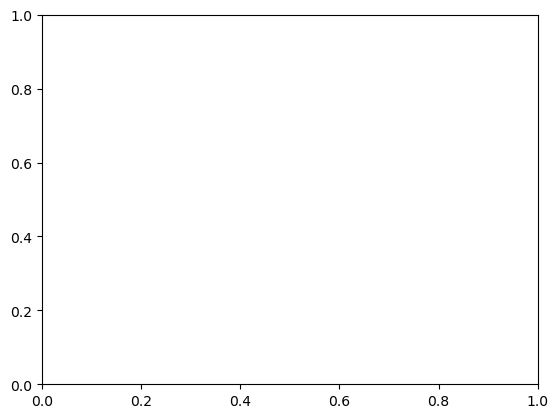

In [272]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
closing_year.plot(ax=ax1)
closing_year_q.plot(ax=ax2)
plt.show()

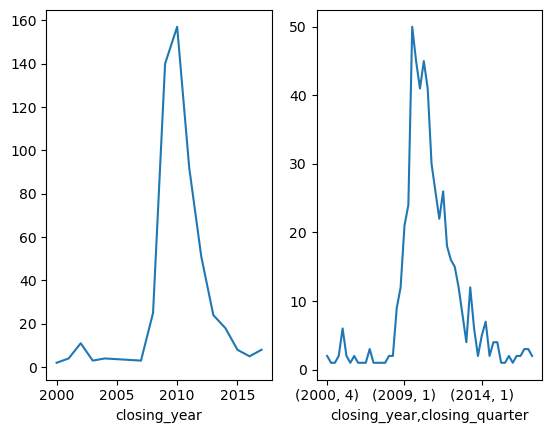

In [273]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2)
closing_year.plot(ax=ax[0])
closing_year_q.plot(ax=ax[1])
plt.show()